## Loading and Visualizing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.io import loadmat

In [2]:
data = loadmat('ex5data1.mat')

X, y = data['X'], data['y'].ravel()
Xtest, ytest = data['Xtest'], data['ytest'].ravel()
Xval, yval = data['Xval'], data['yval'].ravel()

m = y.shape[0]
print(f'Training samples : {X.shape}')
print(f'Training labels : {y.shape}')
print(f'Training samples: \n {X}\n')
print(f'Training labels')

print(f'Test samples : {Xtest.shape}')
print(f'Test labels : {ytest.shape}')

print(f'Validation samples : {Xval.shape}')
print(f'Validation labels : {yval.shape}')




Training samples : (12, 1)
Training labels : (12,)
Training samples: 
 [[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]
 [ -8.94145794]
 [ 15.30779289]
 [-34.70626581]
 [  1.38915437]
 [-44.38375985]
 [  7.01350208]
 [ 22.76274892]]

Training labels
Test samples : (21, 1)
Test labels : (21,)
Validation samples : (21, 1)
Validation labels : (21,)


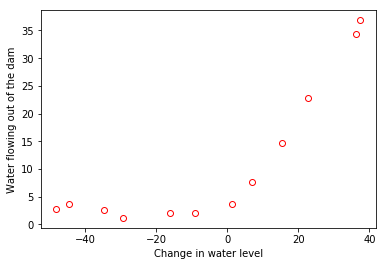

In [3]:
plt.scatter(X.flatten(), y, c='white', edgecolors='red')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.show()

## Regularized Linear Regression Cost and Gradient

In [51]:
def linearRegCostFunction(theta, X, y, lmbda):
    '''Compute cost and gradient for regularized linear regression with multiple variables'''
    
    m = y.shape[0]
    
    y = y.reshape(len(y), 1)
    
    theta = theta.reshape(len(theta),1)
    J = 1/(2 *m) * np.sum((X.dot(theta) - y) ** 2) + (lmbda/(2* m)) * np.sum(theta[1:] ** 2)

    return J

def gradient(theta, X, y, lmbda):
    m = y.shape[0]
    
    y = y.reshape(len(y), 1)
    
    grad = np.zeros(theta.shape)
    theta = theta.reshape(len(theta),1)
    
    grad[0] = (1/m) * np.sum(X.dot(theta) - y)
    grad[1:] = (1/m) * np.sum((X.dot(theta) - y) * X[:, 1:]) + (lmbda/m) * theta[1:].reshape(grad[1:].shape)
    
    grad = grad[:]
    return grad.flatten()

In [52]:
theta = np.array([1,1])
X_aug = np.concatenate([np.ones((m,1)), X], axis=1)
J = linearRegCostFunction(theta, X_aug, y, 1);
grad = gradient(theta, X_aug, y, 1)
print(grad)
print(f'Cost at theta = [1 ; 1]: {J}\n(tbis value should be about 303.993192)\n');

print(f'Gradient at theta = [1 ; 1]:  {grad[0], grad[1]} \n(this value should be about [-15.303016; 598.250744])\n')


[-15.30301567 598.25074417]
Cost at theta = [1 ; 1]: 303.9931922202643
(tbis value should be about 303.993192)

Gradient at theta = [1 ; 1]:  (-15.303015674201186, 598.2507441727035) 
(this value should be about [-15.303016; 598.250744])



## Train Linear Regression

In [56]:
def trainLinearReg(linearRegCostFunction, X, y, lmbda):
    
    # Initialize Theta
    initial_theta = np.zeros(X.shape[1])
    
    costFunction = lambda t: linearRegCostFunction(X, y, t, lmbda)

    # Minimize using scipy
    res = optimize.fmin_cg(linearRegCostFunction, x0=initial_theta, args=(X,y,lmbda), disp=True)
    return res

In [58]:
lmbda = 0
theta= trainLinearReg(linearRegCostFunction, X_aug, y, lmbda)


Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 3
         Function evaluations: 28
         Gradient evaluations: 7


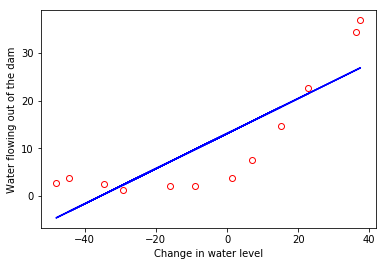

In [59]:
plt.scatter(X.flatten(), y, c='white', edgecolors='red')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.plot(X, X_aug.dot(theta), 'b')
plt.show()

In [60]:
theta= trainLinearReg(linearRegCostFunction, X, y, 3)
prob = Xtest.dot(theta)
J =  1/(2 * len(ytest)) * np.sum((Xtest.dot(theta.reshape(len(theta),1)) - ytest.reshape(len(ytest),1)) ** 2)
J

Optimization terminated successfully.
         Current function value: 105.411324
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3


144.15073922148736

## Learning Curve for Linear Regression 

In [63]:
def learningCurve(X, y, Xval, yval, lmbda):
    m = y.shape[0]
    val_m = yval.shape[0]
    train_error = np.zeros(m)
    val_error = np.zeros(m)
    
    for i in range(1, m+1):
        theta= trainLinearReg(linearRegCostFunction, X[:i,:], y[:i], lmbda)
        
        J_train =  1/(2 *i) * np.sum((X[:i,:].dot(theta.reshape(len(theta),1)) - y[:i].reshape(len(y[:i]),1)) ** 2)
        J_val = 1/(2 * val_m) * np.sum((Xval.dot(theta.reshape(len(theta),1)) - yval.reshape(len(yval),1)) ** 2)
        
        train_error[i - 1] = J_train
        val_error[i - 1] = J_val
    
    return train_error, val_error

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 12
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 24
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 60
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 60
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 21
         Function evaluations: 136
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 17
         Function evaluations: 112
    

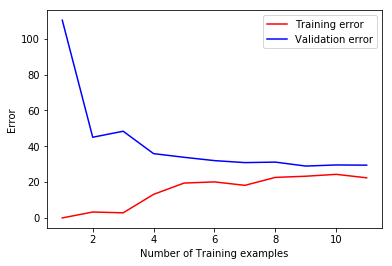

In [64]:
Xval_aug = np.concatenate([np.ones((len(Xval),1)), Xval], axis=1)
train_error, val_error = learningCurve(X_aug, y, Xval_aug, yval, 0)

plt.plot(range(1,m), train_error[1:], 'r', label='Training error')
plt.plot(range(1,m), val_error[1:], 'b', label='Validation error')
plt.xlabel('Number of Training examples')
plt.ylabel('Error')
plt.legend()
plt.show()

In [65]:
print(f'Polynomial Regression (lambda = {lmbda})\n\n')
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(1, m+1):
    print(f'  \t{i}\t\t{train_error[i - 1]}\t{val_error[i - 1]}\n')

Polynomial Regression (lambda = 0)


# Training Examples	Train Error	Cross Validation Error

  	1		2.1562247628194225e-15	205.12109727096887

  	2		2.042611255213982e-13	110.30040734636871

  	3		3.286595045504132	45.01022924883396

  	4		2.842677689399821	48.368911253127614

  	5		13.154048809115057	35.86516317745688

  	6		19.44396251249551	33.8299607129324

  	7		20.09852165510405	31.97098671440143

  	8		18.172858695201086	30.86244634856148

  	9		22.609405424954787	31.135997784547303

  	10		23.26146159261198	28.936207058172617

  	11		24.31724958804428	29.551430870364214

  	12		22.37390649511925	29.433823586740925



## Feature Mapping for Polynomial Regression

In [66]:
def polyFeatures(X, p):
    
    X_poly = X[:]

    for i in range(2, p+1):
        X_poly = np.append(X_poly, X**i, axis=1)
    
    return X_poly

In [67]:
def featureNormalize(X):
    
    mu = np.mean(X, axis=0)
    X -= mu
    
    std = np.std(X, axis=0)
    X = np.true_divide(X, std)
    
    return X, mu, std

In [68]:
p = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, std = featureNormalize(X_poly)
X_poly = np.concatenate([np.ones((m,1)), X_poly], axis=1)

Xval_poly = polyFeatures(Xval, p)
print(Xval_poly.shape)
print(mu.shape)
Xval_poly -= mu
Xval_poly /= std
Xval_poly = np.concatenate([np.ones((Xval_poly.shape[0],1)), Xval_poly], axis=1)

Xtest_poly = polyFeatures(Xtest, p)
Xtest_poly -= mu
Xtest_poly /= std
Xtest_poly = np.concatenate([np.ones((Xtest_poly.shape[0],1)), Xtest_poly], axis=1)

(21, 8)
(8,)


In [69]:
print('Normalized Training Example 1:\n')
print(f'  {X_poly[:,0]}  \n', )
print(f'{X_poly.shape}')

print('Normalized validation Example 1:\n')
print(f'  {Xval_poly[:,0]}  \n', )


Normalized Training Example 1:

  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]  

(12, 9)
Normalized validation Example 1:

  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]  



## Learning Curve for Polynomial Regression

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 55
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 0.108491
         Iterations: 12
         Function evaluations: 231
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 74.611380
         Iterations: 18
         Function evaluations: 396
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 73.166196
         Iterations: 11
         Function evaluations: 242
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 59.147974
         Iterations: 10
         Function evaluations: 220
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 54.236533
         Iterations: 22
         Function evaluations:

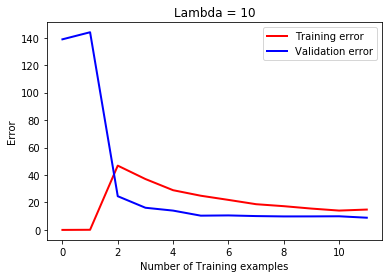

In [70]:
lmbda = 10

train_error, val_error = learningCurve(X_poly, y, Xval_poly, yval, lmbda)

plt.plot(range(m), train_error, 'r', label='Training error', lw=2)
plt.plot(range(m), val_error, 'b', label='Validation error', lw=2)
plt.xlabel('Number of Training examples')
plt.ylabel('Error')
plt.title("Lambda = 10")
plt.legend()
plt.show()

In [71]:
print(f'Polynomial Regression (lambda = {lmbda})\n\n')
print('# Training Examples\tTrain Error\tCross Validabbbtion Error\n')
for i in range(1, m+1):
    print(f'  \t{i}\t\t{train_error[i - 1]}\t{val_error[i - 1]}\n')



Polynomial Regression (lambda = 10)


# Training Examples	Train Error	Cross Validabbbtion Error

  	1		2.3446235138928802e-15	138.8467786799058

  	2		0.1019495780392726	144.0063718524174

  	3		46.82399017165221	24.553758717294297

  	4		37.06809562628412	16.14757418342476

  	5		28.93274769292057	14.069746078647972

  	6		24.905961293603497	10.386616558848653

  	7		21.869107161364255	10.56337070280795

  	8		18.729837719122994	10.084205335386779

  	9		17.294930174594526	9.829351945739969

  	10		15.540216316377133	9.849501825130186

  	11		14.092469684550455	9.935514779382288

  	12		14.825787572234654	8.889706979179818



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 44
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 99
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 297
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 264
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 68
         Function evaluations: 1430
         Gradient evaluations: 130
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 182
         Function evaluations: 352

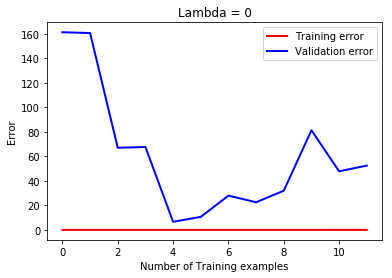

In [72]:
lmbda = 0

train_error, val_error = learningCurve(X_poly, y, Xval_poly, yval, lmbda)

plt.plot(range(m), train_error, 'r', label='Training error', lw=2)
plt.plot(range(m), val_error, 'b', label='Validation error', lw=2)
plt.xlabel('Number of Training examples')
plt.ylabel('Error')
plt.title("Lambda = 0")
plt.legend()
plt.show()

In [74]:
print(f'Polynomial Regression (lambda = {lmbda})\n\n')
print('# Training Examples\tTrain Error\tCross Validabbbtion Error\n')
for i in range(1, m+1):
    print(f'  \t{i}\t\t{train_error[i - 1]}\t{val_error[i - 1]}\n')

Polynomial Regression (lambda = 0)


# Training Examples	Train Error	Cross Validabbbtion Error

  	1		3.239921769031273e-19	161.44216831724236

  	2		9.815781014698298e-15	160.792292522442

  	3		2.698176182862745e-11	67.08497869865991

  	4		5.222066820857237e-10	67.72611260827057

  	5		2.0101488466986297e-10	6.616634814409178

  	6		1.1670164293905354e-09	10.643037402994505

  	7		1.0716673526500077e-08	28.005116183681793

  	8		1.6236846504775663e-06	22.591152295880313

  	9		0.00023047029389343935	32.022215949594624

  	10		0.011520211983012082	81.40271060820353

  	11		0.03128683762625319	47.87390256334612

  	12		0.028902469233529036	52.5421948339007



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 88
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.070327
         Iterations: 20
         Function evaluations: 319
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 17.182727
         Iterations: 19
         Function evaluations: 374
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 13.476899
         Iterations: 22
         Function evaluations: 473
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 10.781524
         Iterations: 10
         Function evaluations: 253
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 9.347014
         Iterations: 37
         Function evaluations: 

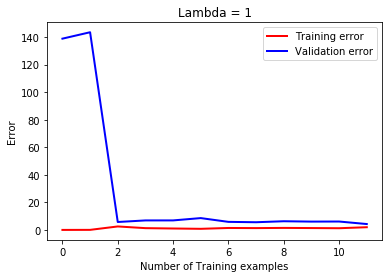

In [75]:
lmbda = 1

train_error, val_error = learningCurve(X_poly, y, Xval_poly, yval, lmbda)

plt.plot(range(m), train_error, 'r', label='Training error', lw=2)
plt.plot(range(m), val_error, 'b', label='Validation error', lw=2)
plt.xlabel('Number of Training examples')
plt.ylabel('Error')
plt.title("Lambda = 1")
plt.legend()
plt.show()

In [76]:
print(f'Polynomial Regression (lambda = {lmbda})\n\n')
print('# Training Examples\tTrain Error\tCross Validabbbtion Error\n')
for i in range(1, m+1):
    print(f'  \t{i}\t\t{train_error[i - 1]}\t{val_error[i - 1]}\n')
    

Polynomial Regression (lambda = 1)


# Training Examples	Train Error	Cross Validabbbtion Error

  	1		7.164967965912487e-17	138.84677500669164

  	2		0.04283638600796075	143.50268937695404

  	3		2.515215208278511	5.749661852119291

  	4		1.2855479711011446	6.890142921918087

  	5		1.0283185404064896	6.900655020534439

  	6		0.7949299168697856	8.581273268812671

  	7		1.409960911440218	5.842285782011866

  	8		1.3162337042120573	5.575923091879005

  	9		1.4587324854381107	6.3002367420100045

  	10		1.353297478021682	6.033578395453196

  	11		1.2285355012968793	6.089687396196665

  	12		1.9586893598361181	4.2633490663455325



## Validation for Selecting Lambda

In [79]:
def validationCurve(X, y, Xval, yval):
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10];
    
    train_error = np.zeros(len(lambda_vec))
    val_error = np.zeros(len(lambda_vec))
    
    m = len(y)
    val_m = len(yval)
    
    for i in range(len(lambda_vec)):
        lmbda = lambda_vec[i]
        theta = trainLinearReg(linearRegCostFunction, X, y, lmbda)
        J_train =  1/(2 *m) * np.sum((X.dot(theta.reshape(len(theta),1)) - y.reshape(len(y),1)) ** 2)
        J_val = 1/(2 * val_m) * np.sum((Xval.dot(theta.reshape(len(theta),1)) - yval.reshape(len(yval),1)) ** 2)
        train_error[i] = J_train
        val_error[i] = J_val
    return lambda_vec, train_error, val_error
    
        

Optimization terminated successfully.
         Current function value: 0.028902
         Iterations: 1423
         Function evaluations: 29392
         Gradient evaluations: 2672
Optimization terminated successfully.
         Current function value: 0.169418
         Iterations: 605
         Function evaluations: 12540
         Gradient evaluations: 1140
Optimization terminated successfully.
         Current function value: 0.243172
         Iterations: 326
         Function evaluations: 6809
         Gradient evaluations: 619
Optimization terminated successfully.
         Current function value: 0.371282
         Iterations: 223
         Function evaluations: 4642
         Gradient evaluations: 422
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 140
         Function evaluations: 2761
         Gradient evaluations: 251
Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 94
         Fu

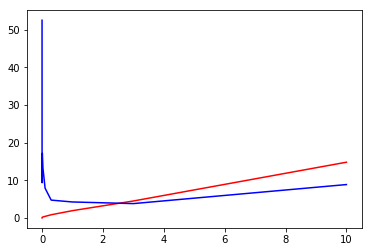

In [80]:
lambda_vec, train_error, val_error = validationCurve(X_poly, y, Xval_poly, yval)

plt.plot(lambda_vec, train_error, 'r',lambda_vec, val_error, 'b')
plt.show()

In [81]:
print('# Lambda\tTrain Error\tCross Validabbbtion Error\n')
for i in range(len(lambda_vec)):
    print(f'  \t{lambda_vec[i]}\t\t{train_error[i - 1]}\t{val_error[i - 1]}\n')

# Lambda	Train Error	Cross Validabbbtion Error

  	0		14.825787572234654	8.889706979179818

  	0.001		0.028902469233529036	52.5421948339007

  	0.003		0.10803304417992385	9.371145178201937

  	0.01		0.1667639112237762	15.924664210141128

  	0.03		0.2179809848098843	17.150736146521048

  	0.1		0.2751267822478283	13.218125261327629

  	0.3		0.43864910930879414	7.926923105553456

  	1		0.868169766538146	4.760808359675385

  	3		1.9586893598361181	4.2633490663455325

  	10		4.525107882142386	3.83217402895953



In [83]:
theta= trainLinearReg(linearRegCostFunction, X_poly, y, 3)

Optimization terminated successfully.
         Current function value: 14.937646
         Iterations: 19
         Function evaluations: 363
         Gradient evaluations: 33


In [84]:
prob = Xtest_poly.dot(theta)
J =  1/(2 * len(ytest)) * np.sum((Xtest_poly.dot(theta.reshape(len(theta),1)) - ytest.reshape(len(ytest),1)) ** 2)
J

3.57201828497697